<a href="https://colab.research.google.com/github/arac22/keras-demo/blob/main/AutoKeras_Demo_Two_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autokeras

In [2]:
import os
import shutil

import numpy as np
import pandas as pd
import tensorflow as tf

import autokeras as ak


In [3]:
TRAIN_DATA_URL = "https://raw.githubusercontent.com/arac22/keras-demo/main/mouse-points-train.csv"
TEST_DATA_URL = "https://raw.githubusercontent.com/arac22/keras-demo/main/mouse-points-eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)



16384/1325 [==================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step
16384/96 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [ ]:
!rm  /root/.keras/datasets/train.csv

In [4]:
!ls -l /root/.keras/datasets/train.csv
!cat  /root/.keras/datasets/train.csv


-rw-r--r-- 1 root root 1325 Aug 30 19:45 /root/.keras/datasets/train.csv
x,y,label
134.00,61.44,C
127.00,141.44,C
121.00,228.44,C
441.00,55.44,D
432.00,142.44,D
425.00,219.44,D
418.00,302.44,D
490.00,277.44,E
459.00,361.44,E
527.00,365.44,E
560.00,295.44,E
408.00,260.44,E
383.00,342.44,E
134.00,61.44,C
127.00,141.44,C
121.00,228.44,C
441.00,55.44,D
432.00,142.44,D
425.00,219.44,D
418.00,302.44,D
490.00,277.44,E
459.00,361.44,E
527.00,365.44,E
560.00,295.44,E
408.00,260.44,E
383.00,342.44,E
134.00,61.44,C
127.00,141.44,C
121.00,228.44,C
441.00,55.44,D
432.00,142.44,D
425.00,219.44,D
418.00,302.44,D
490.00,277.44,E
459.00,361.44,E
527.00,365.44,E
560.00,295.44,E
408.00,260.44,E
383.00,342.44,E
134.00,61.44,C
127.00,141.44,C
121.00,228.44,C
441.00,55.44,D
432.00,142.44,D
425.00,219.44,D
418.00,302.44,D
490.00,277.44,E
459.00,361.44,E
527.00,365.44,E
560.00,295.44,E
408.00,260.44,E
383.00,342.44,E
134.00,61.44,C
127.00,141.44,C
121.00,228.44,C
441.00,55.44,D
432.00,142.44,D
425.00,219.44,D

In [ ]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data classifier with training data.
clf.fit(
    # The path to the train.csv file.
    train_file_path,
    # The name of the label column.
    "label",
    epochs=10,
)



In [6]:
# Predict with the best model.
predicted_y = clf.predict(test_file_path)
# Evaluate the best model with testing data.
print(clf.evaluate(test_file_path, "label"))

1/1 [==============================] - 0s 201ms/step - loss: 0.8208 - accuracy: 0.6000
[0.8207653164863586, 0.6000000238418579]


In [ ]:
from pandas.io.parsers.readers import read_csv

import io
df1 = read_csv('/root/.keras/datasets/train.csv')


In [44]:
# heat map of predictions with the best model 

map_x = np.empty((0,2), int)

map_step = 20 
for i in range(0,400,map_step):
  for j in range(1,640,map_step):
    map_x = np.append(map_x, np.array([[j,i]]), axis=0)

map_predicted_y = clf.predict(map_x)


20/20 [==============================] - 0s 2ms/step


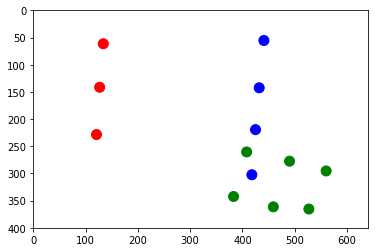

In [46]:
import matplotlib.pyplot as plt

df2=df1.loc[0:12]

fig, ax = plt.subplots()
colors = {'C':'red', 'D':'blue', 'E':'green'}
ax.scatter(df2['x'], df2['y'], c=df2['label'].map(colors), s=100)
plt.axis([0, 640, 0, 400])
ax.invert_yaxis()

plt.show()

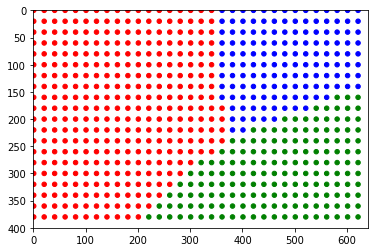

In [45]:
df_map = pd.DataFrame(map_x, columns = ['x','y'])
df_predicted_map = pd.DataFrame(map_predicted_y, columns=['label'])

fig, ax = plt.subplots()
colors = {'C':'red', 'D':'blue', 'E':'green'}
#ax.scatter(map_x[0], map_x[1], c=map_predicted_y[0].map(colors), s=30)
ax.scatter(df_map['x'], df_map['y'], c=df_predicted_map['label'].map(colors),s=20)
plt.axis([0, 640, 0, 400])
ax.invert_yaxis()

plt.show()